In [20]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [16]:
X,Y = make_classification(n_classes=2,n_samples = 400, n_clusters_per_class=1, random_state=3, n_features=2,n_informative=2, n_redundant=0)

In [44]:
Y[Y==0] = -1

In [45]:
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

(400, 2)


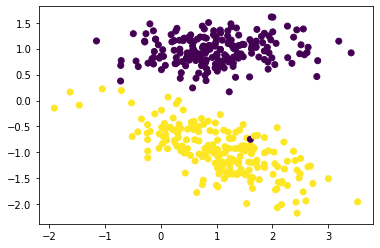

In [46]:
plt.scatter(X[:,0],X[:,1],c=Y)
print(X.shape)
plt.show()

In [117]:
class SVM:
    def __init__(self,C=1.0):
        self.c = C
        self.W = 0
        self.b = 0
    
    def hingeloss(self, W,b,X,Y):
        loss = 0
        
        loss+= 0.5*(np.dot(W,W.T))
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.c * (max(0,1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=400, learning_rate = 0.001,maxItr=100):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        C = self.c
        w = np.zeros((1,no_of_features))
        
        bias = 0
        
        #Initial Loss
        print(self.hingeloss(w,bias,X,Y))
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            l = self.hingeloss(w,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0, no_of_samples, batch_size):
                gradw= 0
                gradb= 0
                
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(w,X[i].T)+bias)
                        
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw += C*Y[i]*X[i]
                            gradb += C*Y[i]
                w = w-n*w + n*gradw
                bias = bias + n*gradb
        self.W=w
        self.b=bias
        
        return w,bias,losses
            
            
            
        
         

In [118]:
mySVM = SVM()

In [119]:
w,b,losses = mySVM.fit(X,Y,maxItr = 100)

400.0


In [120]:
print(losses)

[400.0, 250.60400715431848, 115.38666037621866, 60.521869751081525, 46.54400636477428, 40.19998420640233, 35.99731302816683, 32.758615922285486, 30.241219148210618, 28.26697028600283, 26.622661779813015, 25.290858225112586, 24.108984838698234, 23.08454963405417, 22.28011763247359, 21.63956090917252, 21.116018876684585, 20.678995451643626, 20.290548325871313, 19.96597023250744, 19.641943019752215, 19.33108383930002, 19.044394816943246, 18.777417750133495, 18.54163282537922, 18.330346679885334, 18.134984348680426, 17.950930061821143, 17.767455569341124, 17.587748814267187, 17.408329328996643, 17.234091513070823, 17.089519355215806, 16.946234373335447, 16.81115405931341, 16.698859003733315, 16.586756441969325, 16.47557995356234, 16.364122965926843, 16.25321694723443, 16.147162813774226, 16.046648715866283, 15.94617492028282, 15.846088536406816, 15.748627651212987, 15.662639897685944, 15.58395246479901, 15.506284905227426, 15.427920603041311, 15.350341559197771, 15.272407261304012, 15.1949

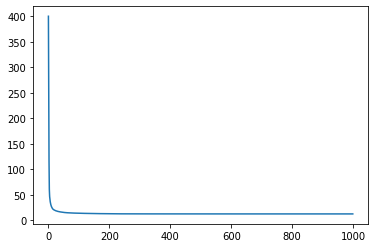

In [121]:
plt.plot(losses)

In [135]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2
    x_p= -(w1*x_1+b+1)/w2
    x_n = -(w1*x_1+b-1)/w2
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,marker = '_',label="Hyperplane WX+B=1" )
    plt.plot(x_1,x_n,marker = '_',label="Hyperplane WX+B=-1")
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

In [136]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[-0.59870516 -2.79691327]] 0.5880000000000004


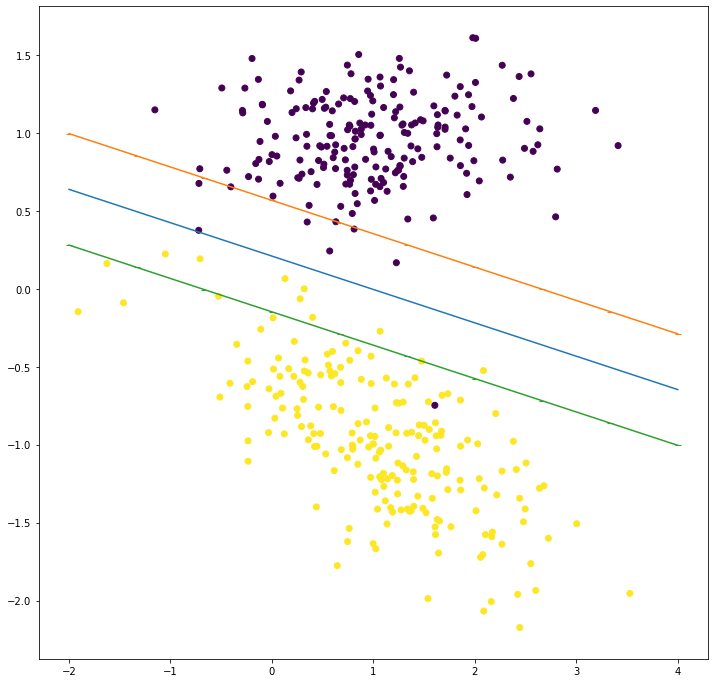

In [137]:
plotHyperplane(W[0,0],W[0,1],B)